In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
classifier = Sequential()

# 1st model

classifier.add(Convolution2D(512, (3, 3), input_shape=(64, 64, 3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=2, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Footdata/train',
                                                 target_size=(64,64),
                                                 batch_size=12,
                                                 class_mode='categorical'
                                                 )

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Footdata/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical'
                                            )

Found 1055 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [ ]:

history=classifier.fit_generator(training_set,epochs = 60,validation_data = test_set,verbose = 1)

classifier.save(r"/content/drive/MyDrive/Footdata/CNNfoot.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
88/88 [==============================] - 13s 139ms/step - loss: 0.6973 - accuracy: 0.5185 - val_loss: 0.6355 - val_accuracy: 0.6683
Epoch 2/60
88/88 [==============================] - 10s 117ms/step - loss: 0.4994 - accuracy: 0.7479 - val_loss: 0.6214 - val_accuracy: 0.7136
Epoch 3/60
88/88 [==============================] - 10s 116ms/step - loss: 0.2956 - accuracy: 0.8787 - val_loss: 0.9030 - val_accuracy: 0.5779
Epoch 4/60
88/88 [==============================] - 10s 118ms/step - loss: 0.2468 - accuracy: 0.9062 - val_loss: 0.2852 - val_accuracy: 0.8693
Epoch 5/60
88/88 [==============================] - 10s 116ms/step - loss: 0.3035 - accuracy: 0.8882 - val_loss: 0.3196 - val_accuracy: 0.8643
Epoch 6/60
88/88 [==============================] - 10s 117ms/step - loss: 0.2045 - accuracy: 0.9204 - val_loss: 0.5680 - val_accuracy: 0.8040
Epoch 7/60
88/88 [==============================] - 10s 116ms/step - loss: 0.1678 - accuracy: 0.9384 - val_loss: 0.2963 - val_accuracy: 0.8894

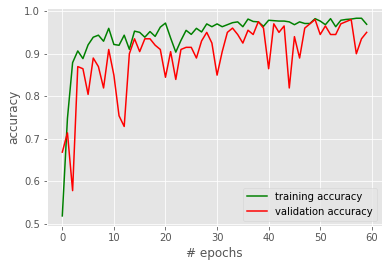

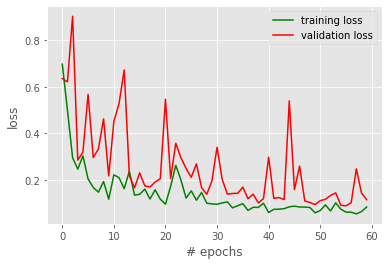

0.9497487545013428


In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/Footdata/cnnfootacc.png')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/Footdata/cnnfootloss.png')
plt.show()


vgg_acc=history.history['val_accuracy'][-1]

print(vgg_acc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
